In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
noise_factor = 0.2
noisy_x_train = x_train + noise_factor * np.random.normal(loc=0, scale=1, size=x_train.shape)
noisy_x_test = x_test + noise_factor * np.random.normal(loc=0, scale=1, size=x_test.shape)

noisy_x_train = np.clip(noisy_x_train, 0, 1)
noisy_x_test = np.clip(noisy_x_test, 0, 1)

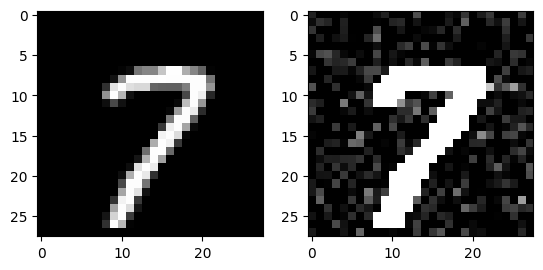

In [9]:
sample = 230

plt.subplot(1, 2, 1)
plt.imshow(x_train[sample].reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(noisy_x_train[sample].reshape(28, 28), cmap='gray')

In [10]:
# Create Model
model = models.Sequential([
    # Input Layer
    layers.Input(shape=(28,28)),
    layers.Flatten(),

    # Hidden Layers
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='sigmoid'),

    # Output Layers
    layers.Dense(784, activation='relu'),
    layers.Reshape((28, 28))
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │       201,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,240 (1.79 MB)

 Trainable params: 468,240 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['mse'])

In [15]:
# Train
model.fit(noisy_x_train, x_train, epochs=100,batch_size=64)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: -143.0983 - mse: 7138.5762
Epoch 2/100
543/938 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: -143.5864 - mse: 7180.3784

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Test, Evaluate
y_pred = model.predict(noisy_x_test)

print(classification_report(y_test, y_pred))

In [ ]:
# classification - digit detector
model.save()


import cv2 as cv
cv.GaussianBlur()
cv.dnn.readNetFromTensorflow()